In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import bioframe as bf
import scipy
import os

In [2]:
os.chdir("/path/to/data/")

In [3]:
E26 = pd.read_csv("allele_freqs_germline.txt", sep="\t", header=None)
E26["cell_line"] = "E26"
E28 = pd.read_csv("allele_freqs_germline.txt", sep="\t", header=None)
E28["cell_line"] = "E28"

In [4]:
colnames = ["chrom", "pos", "ref", "alt", 
                   "depth_B_WGS", "depth_CL_RNA", 
                   "depth_CL_WGS", "alleles_B_WGS",
                   "alleles_CL_RNA", "alleles_CL_WGS", "cell_line"]
E26.columns = colnames
E28.columns = colnames

In [5]:
alleles = pd.concat([E26, E28])
alleles

,chrom,pos,ref,alt,depth_B_WGS,depth_CL_RNA,depth_CL_WGS,alleles_B_WGS,alleles_CL_RNA,alleles_CL_WGS,cell_line
0,chr7,50000127,G,C,57,0,124,"27,30","0,0","79,45",E26
1,chr7,50000809,A,C,51,0,77,"31,20","0,0","64,13",E26
2,chr7,50001132,A,G,65,0,104,"37,28","0,0","70,34",E26
3,chr7,50002298,G,A,71,0,99,"37,34","0,0","65,34",E26
4,chr7,50003982,A,C,65,0,89,"42,23","0,0","51,38",E26
...,...,...,...,...,...,...,...,...,...,...,...
27973,chr7,64998386,G,A,78,4,86,"43,35","2,2","51,35",E28
27974,chr7,64998442,C,T,75,4,108,"39,36","3,1","66,42",E28
27975,chr7,64998617,G,C,63,9,92,"0,63","0,9","0,92",E28
27976,chr7,64998992,G,A,59,8,87,"59,0","6,2","87,0",E28


In [6]:
alleles = alleles[(alleles["depth_B_WGS"] != ".")]

In [7]:
alleles.loc[:,["depth_B_WGS", 
               "depth_CL_RNA", 
               "depth_CL_WGS"]] = alleles.loc[:,["depth_B_WGS", 
                                                 "depth_CL_RNA", 
                                                 "depth_CL_WGS"]].astype(int)

/exports/igmm/eddie/chr11/elias/anaconda/envs/coolpuppy_trans/lib/python3.8/site-packages/pandas/core/indexing.py:1884: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [8]:
alleles.loc[:,["alleles_B_WGS",
               "alleles_CL_RNA", 
               "alleles_CL_WGS"]] = alleles.loc[:,["alleles_B_WGS",
                                                   "alleles_CL_RNA", 
                                                   "alleles_CL_WGS"]].apply(lambda row: row.str.split(',',1).str.get(0).astype(int))

In [9]:
alleles

,chrom,pos,ref,alt,depth_B_WGS,depth_CL_RNA,depth_CL_WGS,alleles_B_WGS,alleles_CL_RNA,alleles_CL_WGS,cell_line
0,chr7,50000127,G,C,57,0,124,27,0,79,E26
1,chr7,50000809,A,C,51,0,77,31,0,64,E26
2,chr7,50001132,A,G,65,0,104,37,0,70,E26
3,chr7,50002298,G,A,71,0,99,37,0,65,E26
4,chr7,50003982,A,C,65,0,89,42,0,51,E26
...,...,...,...,...,...,...,...,...,...,...,...
27973,chr7,64998386,G,A,78,4,86,43,2,51,E28
27974,chr7,64998442,C,T,75,4,108,39,3,66,E28
27975,chr7,64998617,G,C,63,9,92,0,0,0,E28
27976,chr7,64998992,G,A,59,8,87,59,6,87,E28


In [10]:
alleles.loc[:,"alleles_B_WGS"] = alleles["alleles_B_WGS"] / alleles["depth_B_WGS"]
alleles.loc[:,"alleles_CL_RNA"] = alleles["alleles_CL_RNA"] / alleles["depth_CL_RNA"]
alleles.loc[:,"alleles_CL_WGS"] = alleles["alleles_CL_WGS"] / alleles["depth_CL_WGS"]

/exports/igmm/eddie/chr11/elias/anaconda/envs/coolpuppy_trans/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [11]:
#Count the alt instead of ref allele
alleles.loc[:,"alleles_B_WGS"] = 1 - alleles["alleles_B_WGS"]
alleles.loc[:,"alleles_CL_RNA"] = 1 - alleles["alleles_CL_RNA"]
alleles.loc[:,"alleles_CL_WGS"] = 1 - alleles["alleles_CL_WGS"]

In [12]:
alleles = alleles[(alleles["alleles_B_WGS"] > 0.4) &
                  (alleles["alleles_B_WGS"] < 0.6)]

In [13]:
alleles=alleles.reset_index(drop=True)

In [14]:
alleles

,chrom,pos,ref,alt,depth_B_WGS,depth_CL_RNA,depth_CL_WGS,alleles_B_WGS,alleles_CL_RNA,alleles_CL_WGS,cell_line
0,chr7,50000127,G,C,57,0,124,0.526316,NaN,0.362903,E26
1,chr7,50001132,A,G,65,0,104,0.430769,NaN,0.326923,E26
2,chr7,50002298,G,A,71,0,99,0.478873,NaN,0.343434,E26
3,chr7,50004689,T,C,64,0,86,0.484375,NaN,0.488372,E26
4,chr7,50005039,A,T,50,0,80,0.520000,NaN,0.375000,E26
...,...,...,...,...,...,...,...,...,...,...,...
21431,chr7,64997230,G,A,72,12,96,0.569444,0.333333,0.343750,E28
21432,chr7,64997440,T,A,73,11,85,0.493151,0.636364,0.682353,E28
21433,chr7,64998386,G,A,78,4,86,0.448718,0.500000,0.406977,E28
21434,chr7,64998442,C,T,75,4,108,0.480000,0.250000,0.388889,E28


In [15]:
alleles_melt = alleles.loc[:,["pos", "cell_line", "alleles_B_WGS",
                                    "alleles_CL_WGS", "alleles_CL_RNA"]].melt(id_vars=["pos", "cell_line"], 
                                                             value_name = "allele_freq", var_name = "sample")

In [16]:
alleles_melt["pos"] = alleles_melt["pos"]/10**7

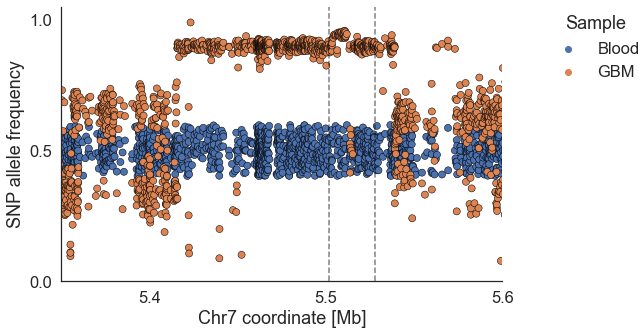

In [17]:
sns.set(font_scale=1.5, style="white", font="Arial", rc = {'figure.figsize':(10,7)})
g = sns.relplot(data = alleles_melt[(alleles_melt["cell_line"] == "E26") &
                                        (alleles_melt["sample"] != "alleles_CL_RNA")], 
                    x="pos", y ="allele_freq", hue="sample",
                    alpha=1, s=50, edgecolor='black', linewidth = 0.5,
                    facet_kws={"legend_out": True})
g.set(title="",
      ylabel="SNP allele frequency", 
      xlabel="Chr7 coordinate [Mb]", 
      xlim=(5.35, 5.6),
      ylim=[0,1.05])
g._legend.set_title("Sample")
new_labels = ['Blood', 'GBM']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
g._legend.set_bbox_to_anchor([1.2, 0.8])
plt.axvline(5.5019, color="black", linestyle="--", alpha=0.5)
plt.axvline(5.5280, color="black", linestyle="--", alpha=0.5)
plt.yticks([0, 0.5, 1])
plt.xticks([5.4, 5.5, 5.6])
plt.tight_layout()

g.figure.savefig("germline_SNPs_E26.svg", bbox_inches='tight', dpi=300)
g.figure.savefig("germline_SNPs_E26.png", bbox_inches='tight', dpi=300)

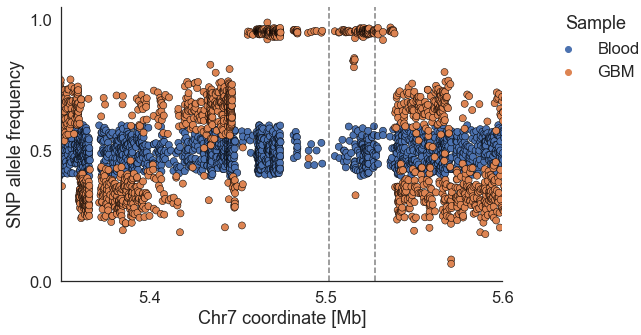

In [18]:
sns.set(font_scale=1.5, style="white", font="Arial", rc = {'figure.figsize':(10,7)})
g = sns.relplot(data = alleles_melt[(alleles_melt["cell_line"] == "E28") &
                                        (alleles_melt["sample"] != "alleles_CL_RNA")], 
                    x="pos", y ="allele_freq", hue="sample",
                    alpha=1, s=50, edgecolor='black', linewidth = 0.5,
                    facet_kws={"legend_out": True})
g.set(title="",
      ylabel="SNP allele frequency", 
      xlabel="Chr7 coordinate [Mb]", 
      xlim=(5.35, 5.6),
      ylim=[0,1.05])
g._legend.set_title("Sample")
new_labels = ['Blood', 'GBM']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
g._legend.set_bbox_to_anchor([1.2, 0.8])
plt.axvline(5.5019, color="black", linestyle="--", alpha=0.5)
plt.axvline(5.5280, color="black", linestyle="--", alpha=0.5)
plt.yticks([0, 0.5, 1])
plt.xticks([5.4, 5.5, 5.6])
plt.tight_layout()

g.figure.savefig("germline_SNPs_E28.svg", bbox_inches='tight', dpi=300)
g.figure.savefig("germline_SNPs_E28.png", bbox_inches='tight', dpi=300)

In [19]:
amplicon = alleles[(alleles["pos"] >= 5.4156030e7) &
                           (alleles["pos"] <= 5.5389615e7)]

In [20]:
amplicon["pos2"] = amplicon["pos"]+1

/tmp/ipykernel_121820/1137948264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amplicon["pos2"] = amplicon["pos"]+1


In [21]:
genes = pd.read_csv("hg38_amplicon_genes.txt", sep="\t", header=None)
genes.columns = ["chrom", "start", "end", "gene"]

In [22]:
genic = bf.overlap(df1 = amplicon, 
           df2 = genes, 
           how = "left",
           cols1 = ["chrom", "pos", "pos2"],
           cols2 = ["chrom", "start", "end"])

In [23]:
genic.dropna(subset=["gene_"])

,chrom,pos,ref,alt,depth_B_WGS,depth_CL_RNA,depth_CL_WGS,alleles_B_WGS,alleles_CL_RNA,alleles_CL_WGS,cell_line,pos2,chrom_,start_,end_,gene_
74,chr7,54349343,G,A,64.0,1.0,665.0,0.500000,1.000000,0.905263,E26,54349344,chr7,54348898,54349845,LINC01445
75,chr7,54349768,T,C,56.0,0.0,600.0,0.464286,NaN,0.845000,E26,54349769,chr7,54348898,54349845,LINC01445
76,chr7,54349768,T,C,56.0,0.0,600.0,0.464286,NaN,0.845000,E26,54349769,chr7,54349365,54349845,LINC01445
77,chr7,54349822,T,C,63.0,0.0,657.0,0.476190,NaN,0.888889,E26,54349823,chr7,54348898,54349845,LINC01445
78,chr7,54349822,T,C,63.0,0.0,657.0,0.476190,NaN,0.888889,E26,54349823,chr7,54349365,54349845,LINC01445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,chr7,55211159,C,A,86.0,670.0,1452.0,0.465116,0.976119,0.957989,E28,55211160,chr7,55205256,55211628,EGFR
1418,chr7,55211587,C,A,48.0,0.0,844.0,0.416667,NaN,0.933649,E28,55211588,chr7,55205256,55211628,EGFR
1419,chr7,55211587,C,A,48.0,0.0,844.0,0.416667,NaN,0.933649,E28,55211588,chr7,55205256,55211628,EGFR
1420,chr7,55211587,C,A,48.0,0.0,844.0,0.416667,NaN,0.933649,E28,55211588,chr7,55205256,55211628,EGFR


In [24]:
genic = bf.overlap(df1 = amplicon, 
           df2 = genes, 
           how = "left",
           cols1 = ["chrom", "pos", "pos2"],
           cols2 = ["chrom", "start", "end"])
genic.fillna(value=np.nan)
genic = genic.dropna(subset=["gene_"])
genic = genic.drop_duplicates(subset=["alleles_B_WGS", 
                                              "alleles_CL_RNA", 
                                              "alleles_CL_WGS"])
genic = genic[genic["depth_CL_RNA"] > 20]
genic["RNA_DNA_ratio"] = genic["alleles_CL_RNA"] / genic["alleles_CL_WGS"] 
expressed = genic[genic["depth_CL_RNA"] > 20]

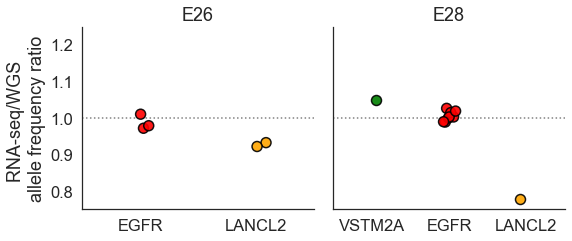

In [25]:
sns.set(font_scale=1.5, style="white", font="Arial", rc = {'figure.figsize':(10,4)})
g = sns.catplot(data = expressed, x = "gene_", y = "RNA_DNA_ratio", legend=False, 
                hue="gene_", palette = ["red", "orange", "green"], alpha=0.9, aspect=1, height=4, s=10,
                edgecolor="black", linewidth=1.5, col="cell_line", sharex=False)
g.map(plt.axhline, y=1, ls=":", c=".5")
g.set_titles(template='{col_name}')
g.set(ylabel = "RNA-seq/WGS \nallele frequency ratio",
      xlabel = "",
      ylim=[0.75, 1.25])
plt.savefig("RNA_DNA_ratio_germline.png", dpi = 300, bbox_inches='tight')
plt.savefig("RNA_DNA_ratio_germline.svg", dpi = 300, bbox_inches='tight')

In [26]:
expressed[["chrom", "pos", "pos"]].to_csv("SNPs.bed", sep="\t", header=False, index=False)

In [27]:
expressed[["cell_line", "gene_", "RNA_DNA_ratio"]].to_csv("RNA_DNA_SNP_ratio.txt", sep="\t", header=True, index=False)